## Chapter 16 RTD's

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [2]:
 def ODEfun(t,Yfuncvec):
    A = Yfuncvec[0] 
    Cdown= 8.45965E-04*t**5 - 3.86653E-02*t**4 + 6.70963E-01*t**3 - 5.36165E+00*t**2 + 1.78271E+01*t**1 - 9.42959E+00    
    Cup = -0.2545*t**3 + 1.5711*t**2 + 0.2813*t**1
    if t > 4:
        C=Cdown
    else:
        C=Cup
    
    dAdt = C
    
    dYfuncvecdt = [dAdt] 
    return dYfuncvecdt

In [3]:
#test of function ODEfun with the addition of Qx
tspan = [0,14] # Range for the independent variable 
y0 = [0] # Initial values for the dependent variables
sol=ODEfun(0,y0)
print (sol) #this should give the constant from Cup=0
print(y0)

[0.0]
[0]


In [4]:
sol=solve_ivp(ODEfun,tspan,y0,rtol=1e-6)#solve the ODE with rtol=1e-6 to match the analytical solution
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 134
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 3.11110000e+00, 3.64294670e+00,
       3.89532627e+00, 4.14770583e+00, 4.39299888e+00, 5.60897422e+00,
       6.95929198e+00, 8.47671951e+00, 1.02836653e+01, 1.18969070e+01,
       1.35101487e+01, 1.40000000e+01])
 t_events: None
        y: array([[0.00000000e+00, 1.40702369e-09, 1.70883452e-07, 1.80447490e-05,
        2.44454476e-03, 7.95027628e-01, 1.11705681e+01, 1.59795508e+01,
        1.84391335e+01, 2.09364638e+01, 2.32706313e+01, 3.30050298e+01,
        4.02954564e+01, 4.52540619e+01, 4.87287790e+01, 5.04294229e+01,
        5.08221865e+01, 5.08038534e+01]])
 y_events: None


In [43]:
### This will print a table of 20 values
print('                     Summary of Results\n')
cdata=[0,0.6,1.4,5,8,10,8,6,4,3,2.2,1.5,0.6,0]
tdata=[0,0.5,1,2,3,4,5,6,7,8,9,10,12,14]

numrows=20
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval,rtol=1e-6)

print('Area under Curve = {:6.4f}g/m^3/min \n'.format (sol.y[0][-1]))

print(' t           E          Eanal      C')
print('(min)   (g/m^3/min)  (g/m^3/min) (g/m^3)')
E=np.zeros(numrows)
Eanal=np.zeros(numrows)
Cfit=np.zeros(numrows)

CupINT = -0.2545*(4**4)/4 + 1.5711*(4**3)/3+ 0.2813*(4**2)/2
CdownINT= 0.000845965*(14**6-4**6)/6 - 0.0386653*(14**5-4**5)/5 + 0.670963*(14**4-4**4)/4 - 5.36165*(14**3-4**3)/3 + 17.8271*(14**2-4**2)/2 - 9.42959*(14-4)
Area=CupINT+CdownINT

row=0
for row in range(numrows):
    t=sol.t[row]   
    if (t > 4): 
        Cdown= 8.45965E-04*t**5 - 3.86653E-02*t**4 + 6.70963E-01*t**3 - 5.36165E+00*t**2 + 1.78271E+01*t**1 - 9.42959E+00    
        Eanal[row]= Cdown/Area
        Cfit[row]=Cdown
        E[row]=Cfit[row]/sol.y[0,-1]
    else:
        Cup = -0.2545*t**3 + 1.5711*t**2 + 0.2813*t**1
        Eanal[row]= Cup/Area
        Cfit[row]=Cup
        E[row]=Cfit[row]/sol.y[0,-1]
    print('{:6.3f}   {:10.3e} {:10.3e} {:10.4f} '.format(sol.t[row],E[row],Eanal[row],Cfit[row] ))



                     Summary of Results

Area under Curve = 50.8039g/m^3/min 

 t           E          Eanal      C
(min)   (g/m^3/min)  (g/m^3/min) (g/m^3)
 0.000    0.000e+00  0.000e+00     0.0000 
 0.737    1.887e-02  1.887e-02     0.9585 
 1.474    5.929e-02  5.929e-02     3.0121 
 2.211    1.092e-01  1.092e-01     5.5499 
 2.947    1.567e-01  1.567e-01     7.9611 
 3.684    1.896e-01  1.896e-01     9.6347 
 4.421    1.816e-01  1.816e-01     9.2247 
 5.158    1.510e-01  1.510e-01     7.6718 
 5.895    1.205e-01  1.204e-01     6.1194 
 6.632    9.348e-02  9.348e-02     4.7493 
 7.368    7.177e-02  7.177e-02     3.6463 
 8.105    5.550e-02  5.550e-02     2.8198 
 8.842    4.383e-02  4.383e-02     2.2266 
 9.579    3.528e-02  3.528e-02     1.7922 
10.316    2.821e-02  2.821e-02     1.4332 
11.053    2.125e-02  2.124e-02     1.0793 
11.789    1.369e-02  1.369e-02     0.6955 
12.526    5.978e-03  5.977e-03     0.3037 
13.263    1.046e-04  1.046e-04     0.0053 
14.000    5.900e-05  5.900

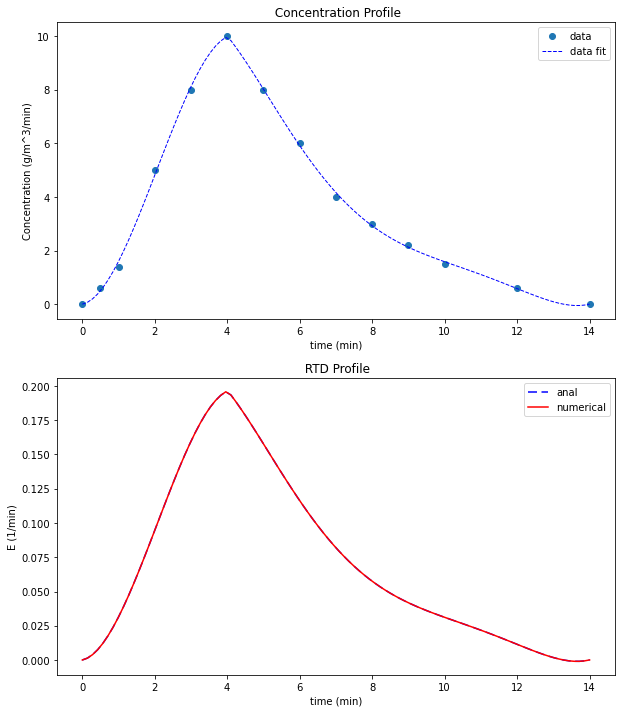

In [37]:
### This is for graph production
cdata=[0,0.6,1.4,5,8,10,8,6,4,3,2.2,1.5,0.6,0]
tdata=[0,0.5,1,2,3,4,5,6,7,8,9,10,12,14]

numrows=100
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval,rtol=1e-6)

E=np.zeros(numrows)
Eanal=np.zeros(numrows)
Cfit=np.zeros(numrows)

CupINT = -0.2545*(4**4)/4 + 1.5711*(4**3)/3+ 0.2813*(4**2)/2
CdownINT= 0.000845965*(14**6-4**6)/6 - 0.0386653*(14**5-4**5)/5 + 0.670963*(14**4-4**4)/4 - 5.36165*(14**3-4**3)/3 + 17.8271*(14**2-4**2)/2 - 9.42959*(14-4)
Area=CupINT+CdownINT

row=0
for row in range(numrows):
    t=sol.t[row]   
    if (t > 4): 
        Cdown= 8.45965E-04*t**5 - 3.86653E-02*t**4 + 6.70963E-01*t**3 - 5.36165E+00*t**2 + 1.78271E+01*t**1 - 9.42959E+00    
        Eanal[row]= Cdown/Area
        Cfit[row]=Cdown
        E[row]=Cfit[row]/sol.y[0,-1]
    else:
        Cup = -0.2545*t**3 + 1.5711*t**2 + 0.2813*t**1
        Eanal[row]= Cup/Area
        Cfit[row]=Cup
        E[row]=Cfit[row]/sol.y[0,-1]



#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(tdata,cdata,'o',label='data')
plt.plot(sol.t,Cfit,':b', label='data fit',linestyle='dashed',linewidth=1)

plt.title(' Concentration Profile')
plt.xlabel('time (min)')
plt.ylabel('Concentration (g/m^3/min)')
plt.legend()

plt.subplot (2,1,2)
plt.plot(sol.t,Eanal,'b',label='anal',dashes=[6, 3])
plt.plot(sol.t,E,':r', label='numerical', linestyle='solid')

plt.title(' RTD Profile')
plt.xlabel('time (min)')
plt.ylabel('E (1/min)')
plt.legend()
